# Code pour l'odinateur d'envoi

## I. Initialisation des fonctions

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from numpy import genfromtxt
import wave

## II. ASCII vers binaire

In [24]:
# Entrée du message à envoyer
message_input = input(str("Entrez le message à transmettre : "))

In [25]:
# Fonction de version d'un string en binaire
# Le code suivant va rechercher dans une bibliothèque déjà présente sur Jupyter, la table ASCII
# A partir de celle si, il va décomposer le mot lettre par lettre
# Le rechercher dans la bibliothèque et le rentrer
# La dernière partie sert à ajouter des 0 pour être sur que ce soit un octet
message_input_bin = [int(bit) for bit in ''.join(format(ord(char), 'b').zfill(8) for char in message_input)]
print(message_input_bin)
print(len(message_input_bin))

[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1]
192


## III. Création de la trame

In [26]:
# Création de la liste pour la trame
trame_ppp = []

#Initialisation des parties de la trame
fanion =  [0,1,1,1,1,1,1,0]
adresse = [1,1,1,1,1,1,1,1]
controle = [0,0,0,0,0,0,1,1]
protocole = [0,0,0,0,0,0,0,0]
# FCS = 

# Injection dans la trame
trame_ppp.extend(fanion)
trame_ppp.extend(adresse)
trame_ppp.extend(controle)
trame_ppp.extend(protocole)

# Affichage de la taille des éléments
print("La taille de la trame sans données est de ", len(trame_ppp),"bits.")

#Injection des données
trame_ppp.extend(message_input_bin)

# Affichage de la taille des éléments
print("La taille de la trame avec données est de ", len(trame_ppp),"bits.")

# Injection dans la trame
# trame_ppp.extend(FCS)
trame_ppp.extend(fanion)

# Affichage de la taille des éléments
print("La taille de la trame complète est de ", len(trame_ppp),"bits.")
print(trame_ppp)

La taille de la trame sans données est de  32 bits.
La taille de la trame avec données est de  224 bits.
La taille de la trame complète est de  232 bits.
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]


## IV. Encodage NRZ unipolaire

In [27]:
# Déclaration de la liste des données encodés par Manchester
message_input_encode = []

# Encodage des valeurs binaires eet injections dans la liste
for i in range (0, len(message_input_bin)):
    if message_input_bin[i] == 1:
        message_input_encode.extend([-1,1])
    elif message_input_bin[i] == 0:
        message_input_encode.extend([1, -1])

print("Le message '",message_input,"' encodé en NRZ donne : ")
print(message_input_encode)
print("Sa taille est de",len(message_input_encode), "bits.")

Le message ' Bla Blo Blu Bli Blou Bly ' encodé en NRZ donne : 
[1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1

## V. Modulation ASK

In [28]:
M = message_input_encode        # Message binaire M

Fe = 44100                      # Fréquence d'échantillonnage

baud = 30                       # Débit souhaité sur le canal de transmission exprimé en bit/s
Nbits = len(M)                  # Nombre de bits initial (taille du message M)
Ns = int(Fe/baud)               # Nombre de symboles par bit (Fréquence d'échantillonage / Débit souhaité)
print(Ns)
N = int(Nbits * Ns)             # Nombre de bits total à moduler (Nombre de bits initial * Nombre de symbole par bit)
print(N)

1470
564480


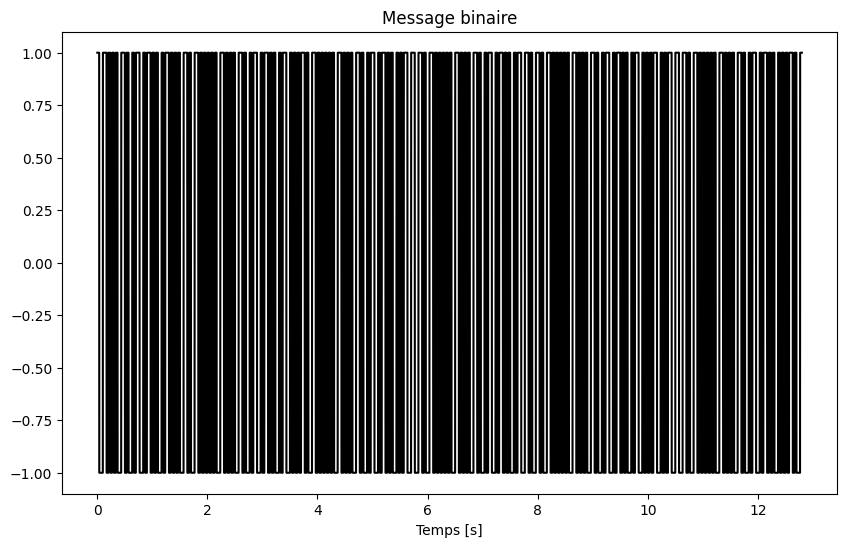

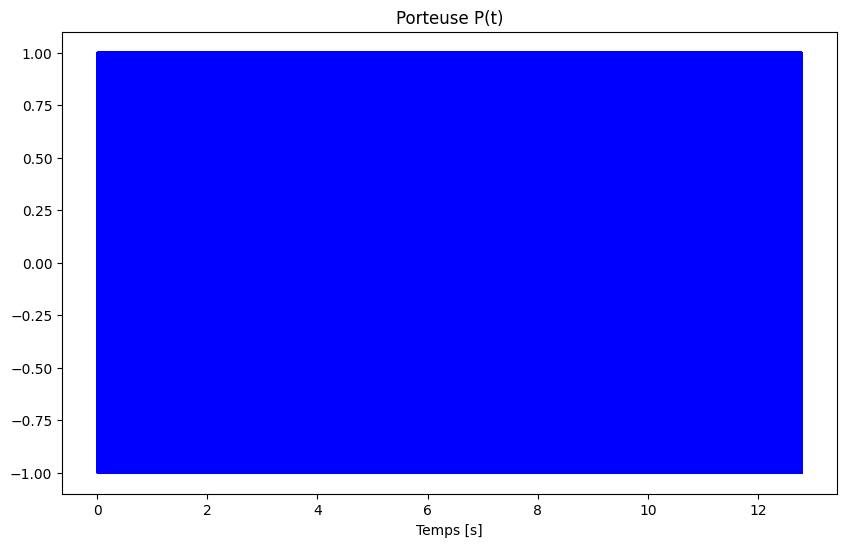

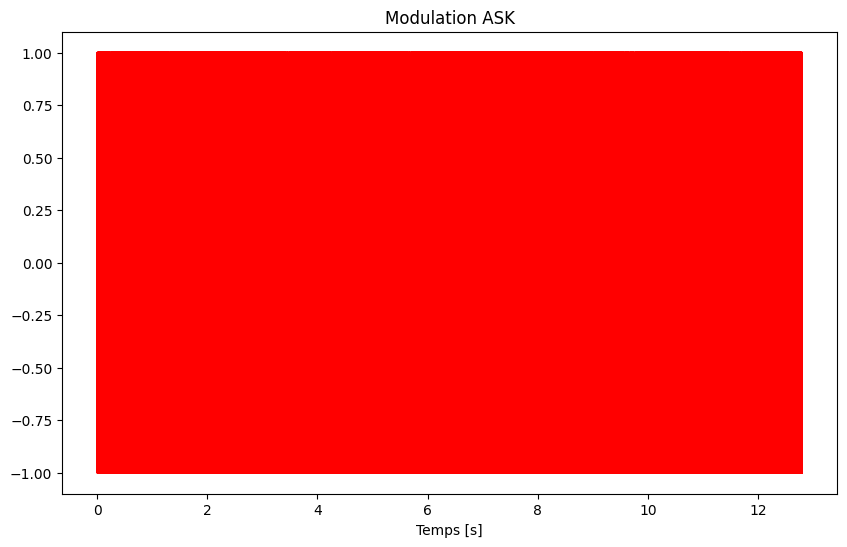

In [29]:
M_duplique = np.repeat(M, Ns)      # On peut aussi le faire avec la fonction tile de numpy : binaire = np.tile(bits,(1,Ns))

# On génère le vecteur temps
t = np.linspace(0.0, N/Fe, N)      # On peut aussi le générer avec la commande arange : t = np.arange(0.0, N)/Fe 

# On génère la porteuse P(t)
Ap = 1
Fp = 21050
Porteuse = Ap*np.sin(2*np.pi*Fp*t) # Porteuse P(t)

# On réalise la modulation en amplitude (ASK = porteuse * binaire)
ASK = M_duplique*Porteuse

# Affiche du message binaire, la porteuse et le résultat de la modulation ASK
plt.figure( figsize = (10, 6))
plt.plot(t, M_duplique, 'black')
plt.xlabel('Temps [s]')
plt.title('Message binaire')

plt.figure( figsize = (10, 6))
plt.plot(t, Porteuse, 'blue')
plt.xlabel('Temps [s]')
plt.title('Porteuse P(t)')

plt.figure( figsize = (10, 6))
plt.plot(t, ASK, 'red')
plt.xlabel('Temps [s]')
plt.title('Modulation ASK')

plt.show()

## VI. Enregistrement de la modulation

In [30]:
# sd.play(ASK)
# sd.wait()

# soundfile.write("modulation_ASK.wav", ASK, 44100)

## VII. Enregistrement

In [31]:
# FILE_NAME = './test.wav'           # Nom du fichier à enregistrer
# wave_length = 5                    # Durée d'enregistrement (secondes)
# sample_rate = Fe                   # Fréquence d'échantillonnage

# # Démarrer l'enregistrement (wave_longueur Enregistrez pendant secondes. Attendez la fin de l'enregistrement avec wait)
# data = sd.rec(int(wave_length * sample_rate), sample_rate, channels=1)
# sd.wait()

# # Normaliser. Puisqu'il est enregistré avec 16 bits de bit de quantification, il est maximisé dans la plage de int16.
# data = data / data.max() * np.iinfo(np.int16).max

# # float -> int
# data = data.astype(np.int16)

# # Enregistrer le fichier
# with wave.open(FILE_NAME, mode='wb') as wb:
#     wb.setnchannels(1)              # monaural
#     wb.setsampwidth(2)              # 16 bits = 2 bytes
#     wb.setframerate(sample_rate)
#     wb.writeframes(data.tobytes())  #Convertir en chaîne d'octets